# **Data Understanding**  
**Data understanding** Merupakan langkah awal yang bertujuan untuk memahami data secara mendalam sebelum melakukan analisis lebih lanjut. Pemahaman data yang baik sangat krusial karena akan memengaruhi keberhasilan seluruh proses data mining.


In [1]:
!pip install pymysql

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.0/45.0 kB 1.7 MB/s eta 0:00:00


 ## Cek koneksi MySQL

In [2]:
import pymysql

# Konfigurasi koneksi
host = "mysqlpendata-ilhamalmafazt-dm.h.aivencloud.com"  # Ganti host dengan host dari Aiven.io
port = 19867
user = "avnadmin"
password = "AVNS_vnxDk9lOvZgFnuKlezN"
database = "defaultdb"

# Buat koneksi
mysql_conn = pymysql.connect(
    host=host,
    port=port,
    user=user,
    password=password,
    database=database,
    ssl={'ssl': {}}  # Jika menggunakan SSL
)

cursor = mysql_conn.cursor()
cursor.execute("SELECT * FROM iris_sql.iris LIMIT 5;")
tampil = cursor.fetchall()
for data in tampil:
    print(data)
mysql_conn.close()


(1, 'Iris-setosa', 1.4, 0.2)
(2, 'Iris-setosa', 50.0, 20.0)
(3, 'Iris-setosa', 1.3, 0.2)
(4, 'Iris-setosa', 1.5, 0.2)
(5, 'Iris-setosa', 1.4, 0.2)


In [3]:
!pip install psycopg2

## Cek Koneksi Postgre

In [4]:
import psycopg2

# Konfigurasi koneksi
host = "postgrependata-ilhamalmafazt-dm.i.aivencloud.com"
port = 19867  # Biasanya 25061 untuk PostgreSQL di Aiven.io
user = "avnadmin"
password = "AVNS_yBhPcNuf-iJ2fja4CBU"
database = "defaultdb"

# Buat koneksi
postgres_conn = psycopg2.connect(
    host=host,
    port=port,
    user=user,
    password=password,
    database=database,
    sslmode="require"
)

cursor = postgres_conn.cursor()
cursor.execute("SELECT * FROM postgre.postgre LIMIT 5;")
tampil = cursor.fetchall()
for data in tampil:
    print(data)
postgres_conn.close()


(1, 'Iris-setosa', 5.1, 3.5)
(3, 'Iris-setosa', 4.7, 3.2)
(4, 'Iris-setosa', 4.6, 3.1)
(5, 'Iris-setosa', 5.0, 3.6)
(6, 'Iris-setosa', 5.4, 3.9)


In [5]:
!pip install pymysql pandas

## Merging Data

In [6]:
import pymysql
import psycopg2
import pandas as pd

# Konfigurasi koneksi MySQL (Aiven.io)
mysql_conn = pymysql.connect(
    host = "mysqlpendata-ilhamalmafazt-dm.h.aivencloud.com",  # Ganti dengan host dari Aiven.io
    port = 19867,  # Biasanya 25060 untuk MySQL di Aiven.io
    user = "avnadmin",
    password = "AVNS_vnxDk9lOvZgFnuKlezN",
    database = "defaultdb",
)

# Konfigurasi koneksi PostgreSQL (Aiven.io)
postgres_conn = psycopg2.connect(
    host = "postgrependata-ilhamalmafazt-dm.i.aivencloud.com",
    port = 19867,  # Biasanya 25061 untuk PostgreSQL di Aiven.io
    user = "avnadmin",
    password = "AVNS_yBhPcNuf-iJ2fja4CBU",
    database = "defaultdb",
    sslmode="require"
)

# Ambil data dari MySQL
mysql_query = "SELECT id, `petal length`, `petal width` FROM iris_sql.iris;"
df_mysql = pd.read_sql(mysql_query, mysql_conn)

# Ambil data dari PostgreSQL
postgres_query = "SELECT * FROM postgre.postgre;"  # Pastikan schema sudah benar
df_postgres = pd.read_sql(postgres_query, postgres_conn)

# Tutup koneksi
mysql_conn.close()
postgres_conn.close()

# Gabungkan data secara vertikal
df_combined = pd.merge(df_postgres,df_mysql,on="id" ,how="left")

# Tampilkan data
print(df_combined.head())


<ipython-input-6-50f716b5d160>:26: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_mysql = pd.read_sql(mysql_query, mysql_conn)
<ipython-input-6-50f716b5d160>:30: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_postgres = pd.read_sql(postgres_query, postgres_conn)


   id        Class  sepal length  sepal width  petal length  petal width
0   1  Iris-setosa           5.1          3.5           1.4          0.2
1   3  Iris-setosa           4.7          3.2           1.3          0.2
2   4  Iris-setosa           4.6          3.1           1.5          0.2
3   5  Iris-setosa           5.0          3.6           1.4          0.2
4   6  Iris-setosa           5.4          3.9           1.7          0.4


## Profiling Data Bunga Iris

In [7]:
kolom = df_combined[["sepal length","sepal width", "petal length","petal width"]]

hitung = kolom.agg(['mean', lambda x: x.mode().iloc[0],'median', 'std', 'min', 'max'])
hitung.index = hitung.index.to_series().replace('<lambda>','modus')
from tabulate import tabulate
print(tabulate(hitung, headers='keys', tablefmt= 'pretty'))

+--------+--------------------+-------------------+--------------------+--------------------+
|        |    sepal length    |    sepal width    |    petal length    |    petal width     |
+--------+--------------------+-------------------+--------------------+--------------------+
|  mean  | 11.081333333333333 |       5.924       | 7.844666666666665  | 2.8299999999999996 |
| modus  |        5.0         |        3.0        |        1.5         |        0.2         |
| median |        5.95        |        3.0        |        4.5         |        1.4         |
|  std   | 15.960712615781896 | 8.706293951068739 | 13.349707970898745 | 5.016987919582318  |
|  min   |        4.3         |        2.0        |        1.0         |        0.1         |
|  max   |        72.0        |       39.0        |        67.0        |        25.0        |
+--------+--------------------+-------------------+--------------------+--------------------+


In [8]:
!pip install matplotlib seaborn


## Visualisasi Berdasarkan Kolom


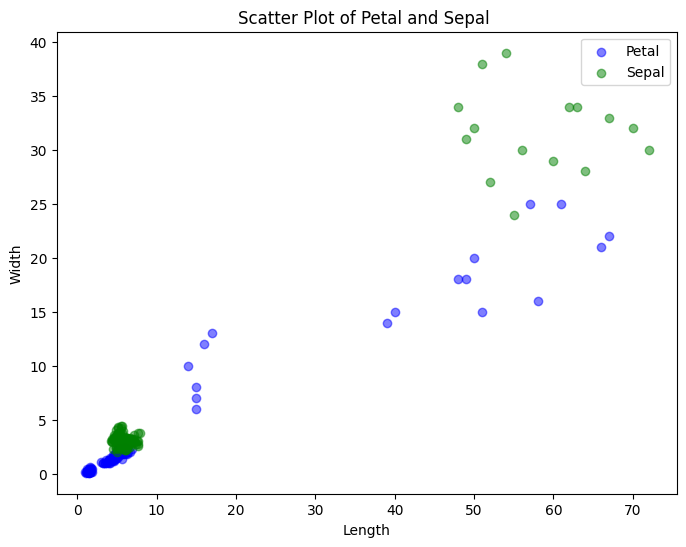

In [9]:
import matplotlib.pyplot as plt

# Plot scatter
plt.figure(figsize=(8,6))

# Scatter plot pertama (Petal Length vs Petal Width)
plt.scatter(df_combined["petal length"], df_combined["petal width"], color='blue', alpha=0.5, label="Petal")

# Scatter plot kedua (Sepal Length vs Sepal Width) - (Pastikan kolomnya ada)
plt.scatter(df_combined["sepal length"], df_combined["sepal width"], color='green', alpha=0.5, label="Sepal")

# Tambahkan label
plt.xlabel("Length")
plt.ylabel("Width")
plt.title("Scatter Plot of Petal and Sepal ")

# Tambahkan legenda
plt.legend()

# Tampilkan plot
plt.show()


## Visualisasi Berdasarkan Kelas

<ipython-input-10-fae5b1b0c188>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_combined, x=class_col, y=kolom, palette=color)
<ipython-input-10-fae5b1b0c188>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_combined, x=class_col, y=kolom, palette=color)
<ipython-input-10-fae5b1b0c188>:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_combined, x=class_col, y=kolom, palette=color)
<ipython-input-10-fae5b1b0c188>:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14

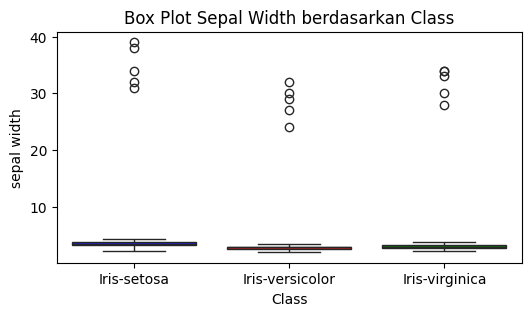

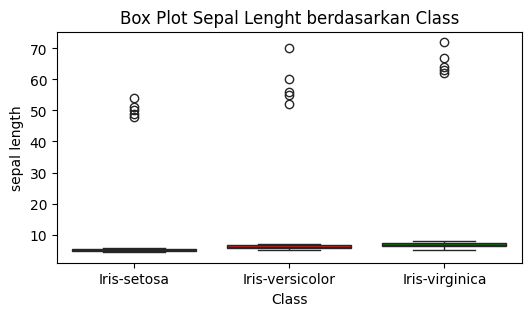

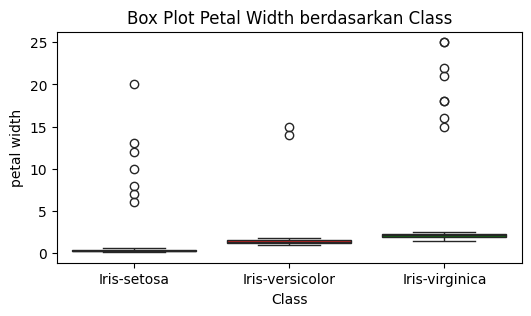

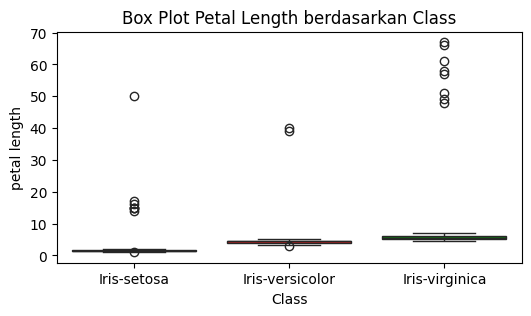

In [ ]:
import seaborn as sns

kolom = "sepal width"
class_col = "Class"
plt.figure(figsize=(6, 3))

color = {"Iris-setosa": "blue", "Iris-versicolor": "red", "Iris-virginica": "green"}
sns.boxplot(data=df_combined, x=class_col, y=kolom, palette=color)
plt.xlabel("Class")
plt.ylabel(kolom)
plt.title("Box Plot Sepal Width berdasarkan Class")

kolom = "sepal length"
class_col = "Class"
plt.figure(figsize=(6, 3))

color = {"Iris-setosa": "blue", "Iris-versicolor": "red", "Iris-virginica": "green"}
sns.boxplot(data=df_combined, x=class_col, y=kolom, palette=color)
plt.xlabel("Class")
plt.ylabel(kolom)
plt.title("Box Plot Sepal Lenght berdasarkan Class")

kolom = "petal width"
class_col = "Class"
plt.figure(figsize=(6, 3))

color = {"Iris-setosa": "blue", "Iris-versicolor": "red", "Iris-virginica": "green"}
sns.boxplot(data=df_combined, x=class_col, y=kolom, palette=color)
plt.xlabel("Class")
plt.ylabel(kolom)
plt.title("Box Plot Petal Width berdasarkan Class")

kolom = "petal length"
class_col = "Class"
plt.figure(figsize=(6, 3))

color = {"Iris-setosa": "blue", "Iris-versicolor": "red", "Iris-virginica": "green"}
sns.boxplot(data=df_combined, x=class_col, y=kolom, palette=color)
plt.xlabel("Class")
plt.ylabel(kolom)
plt.title("Box Plot Petal Length berdasarkan Class")


plt.show()

## Menjelaskan Code dengan Cerita

### Dongeng Dua Kerajaan Data

Pada suatu masa, di dunia digital yang luas, terdapat dua kerajaan besar: **Kerajaan MySQL** dan **Kerajaan PostgreSQL**, masing-masing menyimpan harta karun data yang luar biasa.

Ilham, sang penyihir data dari desa Pythonia, memulai petualangannya...


Di desa kecil bernama Pythonia, hiduplah seorang pangeran data muda bernama Ilham, yang sangat penasaran dengan kekuatan data dari kedua kerajaan tersebut. Ia mempersiapkan dua mantra sakti untuk membuka gerbang rahasia dari masing-masing istana.

Dengan mantra pertama **pymysql** , Pangeran mengucapkan:


In [ ]:
mysql_conn = pymysql.connect(
    host = "mysqlpendata-ilhamalmafazt-dm.h.aivencloud.com",  # Ganti dengan host dari Aiven.io
    port = 19867,  # Biasanya 25060 untuk MySQL di Aiven.io
    user = "avnadmin",
    password = "AVNS_vnxDk9lOvZgFnuKlezN",
    database = "defaultdb",
)

Gerbang kastil MySQL pun terbuka, dan Ilham mengambil sebagian harta karunnya berupa tabel **iris_sql.iris**, yang berisi bunga-bunga indah dengan kelopak (petal) yang memikat hati.

Tak kalah penting, Pangeran kemudian menggunakan psycopg2, mantra  untuk berbicara dengan para penjaga gerbang PostgreSQL:

In [ ]:
postgres_conn = psycopg2.connect(
    host = "postgrependata-ilhamalmafazt-dm.i.aivencloud.com",
    port = 19867,  # Biasanya 25061 untuk PostgreSQL di Aiven.io
    user = "avnadmin",
    password = "AVNS_yBhPcNuf-iJ2fja4CBU",
    database = "defaultdb",
    sslmode="require"
)

Pangeran diberi akses untuk mengambil semua data dari tabel **postgre.postgre**, yang konon kabarnya menyimpan identitas dan asal muasal bunga-bunga itu.

Mengumpulkan Harta Karun
Ilham lalu menggunakan kitab suci bernama pandas untuk menampung isi kedua kerajaan: